# Understanding the Data: From the file `heart-disease.names`

data_path = 'data/heart+disease/processed.cleveland.data'

From the file `heart-disease.names`, the data has 14 attributes and 303 instances. After close examination, of the 14 attributes, 13 are used for prediction and the 14th attribute is the predicted attribute. Of all the attributes, 9 are categorical and 5 are continuous.

### Categorical Attributes
- sex: 1 = male; 0 = female
- cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- exang: exercise induced angina (1 = yes; 0 = no)
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
- num: diagnosis of heart disease (angiographic disease status)


## Load the Dataset

For this task, I'll be using the `processed.cleveland.data` dataset for this analysis. 

In [1]:
import pandas as pd

# load the data
data_path = 'data/heart+disease/processed.cleveland.data'
data = pd.read_csv(data_path, header=None)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

data.columns = columns
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA: Check unique values in Categorical Columns

The reason for doing this is to check if there are any missing values in the categorical columns. That will help in mapping the categorical columns to the correct values and if missing values are found, we can handle them appropriately.

In [2]:
# Get Unique Values in Each Column
def print_unique_values(df, categorical_columns):
    for column in categorical_columns:
        if column in df.columns:
            unique_values = df[column].unique()
            print(f"\n {len(unique_values)} Unique values in '{column}':")
            print(unique_values)
            print("-" * 50)
        else:
            print(f"\nWarning: Column '{column}' not found in the DataFrame")

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print_unique_values(data, categorical_columns)



 2 Unique values in 'sex':
[1. 0.]
--------------------------------------------------

 4 Unique values in 'cp':
[1. 4. 3. 2.]
--------------------------------------------------

 2 Unique values in 'fbs':
[1. 0.]
--------------------------------------------------

 3 Unique values in 'restecg':
[2. 0. 1.]
--------------------------------------------------

 2 Unique values in 'exang':
[0. 1.]
--------------------------------------------------

 3 Unique values in 'slope':
[3. 2. 1.]
--------------------------------------------------

 5 Unique values in 'ca':
['0.0' '3.0' '2.0' '1.0' '?']
--------------------------------------------------

 4 Unique values in 'thal':
['6.0' '3.0' '7.0' '?']
--------------------------------------------------


### Explanation

From the output, we can see that there are missing values in the `ca` and `thal` columns. I will handle these missing values by mapping them to a new category, say `unknown`.

In [3]:
# label categorical columns

import numpy as np

sex_map = {1.0: 'male', 0.0: 'female'}
cp_map = {1.0: 'typical angina', 2.0: 'atypical angina', 3.0: 'non-anginal pain', 4.0: 'asymptomatic'}
fbs_map = {1.0: 'true', 0.0: 'false'}
restecg_map = {0.0: 'normal', 1.0: 'abnormal', 2.0: 'left ventricular hypertrophy'}
exang_map = {1.0: 'yes', 0.0: 'no'}
slope_map = {1.0: 'upsloping', 2.0: 'flat', 3.0: 'downsloping'}
ca_map = {'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '?': np.nan}
thal_map = {'3.0': 'normal', '6.0': 'fixed defect', '7.0': 'reversible defect', '?': np.nan}


data['sex'] = data['sex'].map(sex_map)
data['cp'] = data['cp'].map(cp_map)
data['fbs'] = data['fbs'].map(fbs_map)
data['restecg'] = data['restecg'].map(restecg_map)
data['exang'] = data['exang'].map(exang_map)
data['slope'] = data['slope'].map(slope_map)
data['ca'] = data['ca'].map(ca_map)
data['thal'] = data['thal'].map(thal_map)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,typical angina,145.0,233.0,true,left ventricular hypertrophy,150.0,no,2.3,downsloping,0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,false,left ventricular hypertrophy,108.0,yes,1.5,flat,3,normal,2
2,67.0,male,asymptomatic,120.0,229.0,false,left ventricular hypertrophy,129.0,yes,2.6,flat,2,reversible defect,1
3,37.0,male,non-anginal pain,130.0,250.0,false,normal,187.0,no,3.5,downsloping,0,normal,0
4,41.0,female,atypical angina,130.0,204.0,false,left ventricular hypertrophy,172.0,no,1.4,upsloping,0,normal,0


In [4]:
# check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

## Explanation

From the output, we can see that there are missing values in the `ca` and `thal` columns. Given the importance of these columns, I will drop the rows with missing values.

In [5]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
target = data['num']
data.drop(columns=['num'])
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False, dtype=int)
data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,num,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_downsloping,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversible defect
0,63.0,145.0,233.0,150.0,2.3,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,2,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)

print(data_scaled.describe())

                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.226105e-16  4.904420e-16 -1.958777e-16  4.784800e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

                num    sex_female      sex_male  cp_asymptomatic  \
count  2.970000e+02  2.970000e+02  2.970000e+02     2.970000e+02   
mean  -2.242875e-17 -9.569599e-17 -7.177199e-17    -5.980999e-17   
std    1.001688e+00  1.001688e+00  1.001688e+00     1.001688e+00   
min   -7.676679e-01 -6.910947e-01 

In [8]:
print("Shape of the scaled dataset:", data_scaled.shape)
data_scaled.head()


Shape of the scaled dataset: (297, 29)


,age,trestbps,chol,thalach,oldpeak,num,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,...,slope_downsloping,slope_flat,slope_upsloping,ca_0,ca_1,ca_2,ca_3,thal_fixed defect,thal_normal,thal_reversible defect
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.767668,-0.691095,0.691095,-0.957146,-0.444500,...,3.625308,-0.925338,-0.937948,0.840771,-0.529313,-0.383038,-0.268705,3.937004,-1.110443,-0.794901
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.855089,-0.691095,0.691095,1.044772,-0.444500,...,-0.275839,1.080686,-0.937948,-1.189384,-0.529313,-0.383038,3.721559,-0.254000,0.900542,-0.794901
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.043711,-0.691095,0.691095,1.044772,-0.444500,...,-0.275839,1.080686,-0.937948,-1.189384,-0.529313,2.610707,-0.268705,-0.254000,-1.110443,1.258018
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.767668,-0.691095,0.691095,-0.957146,-0.444500,...,3.625308,-0.925338,-0.937948,0.840771,-0.529313,-0.383038,-0.268705,-0.254000,0.900542,-0.794901
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.767668,1.446980,-1.446980,-0.957146,2.249717,...,-0.275839,-0.925338,1.066157,0.840771,-0.529313,-0.383038,-0.268705,-0.254000,0.900542,-0.794901


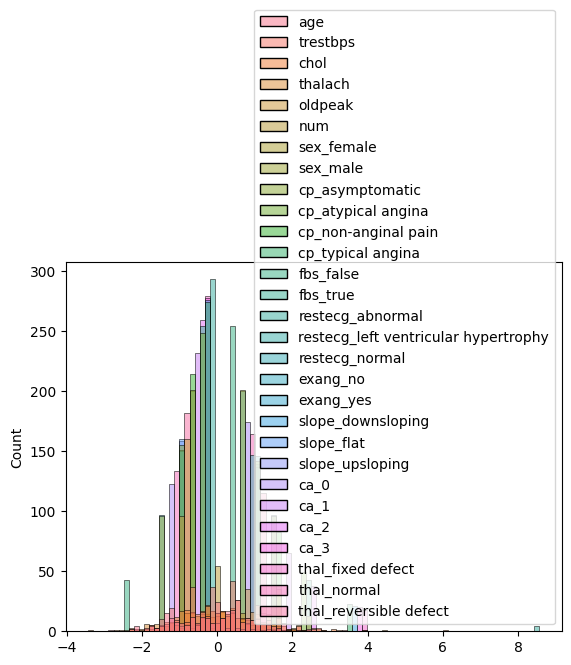

In [9]:
# plot the distribution of the scaled dataset 
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data_scaled)
plt.show()

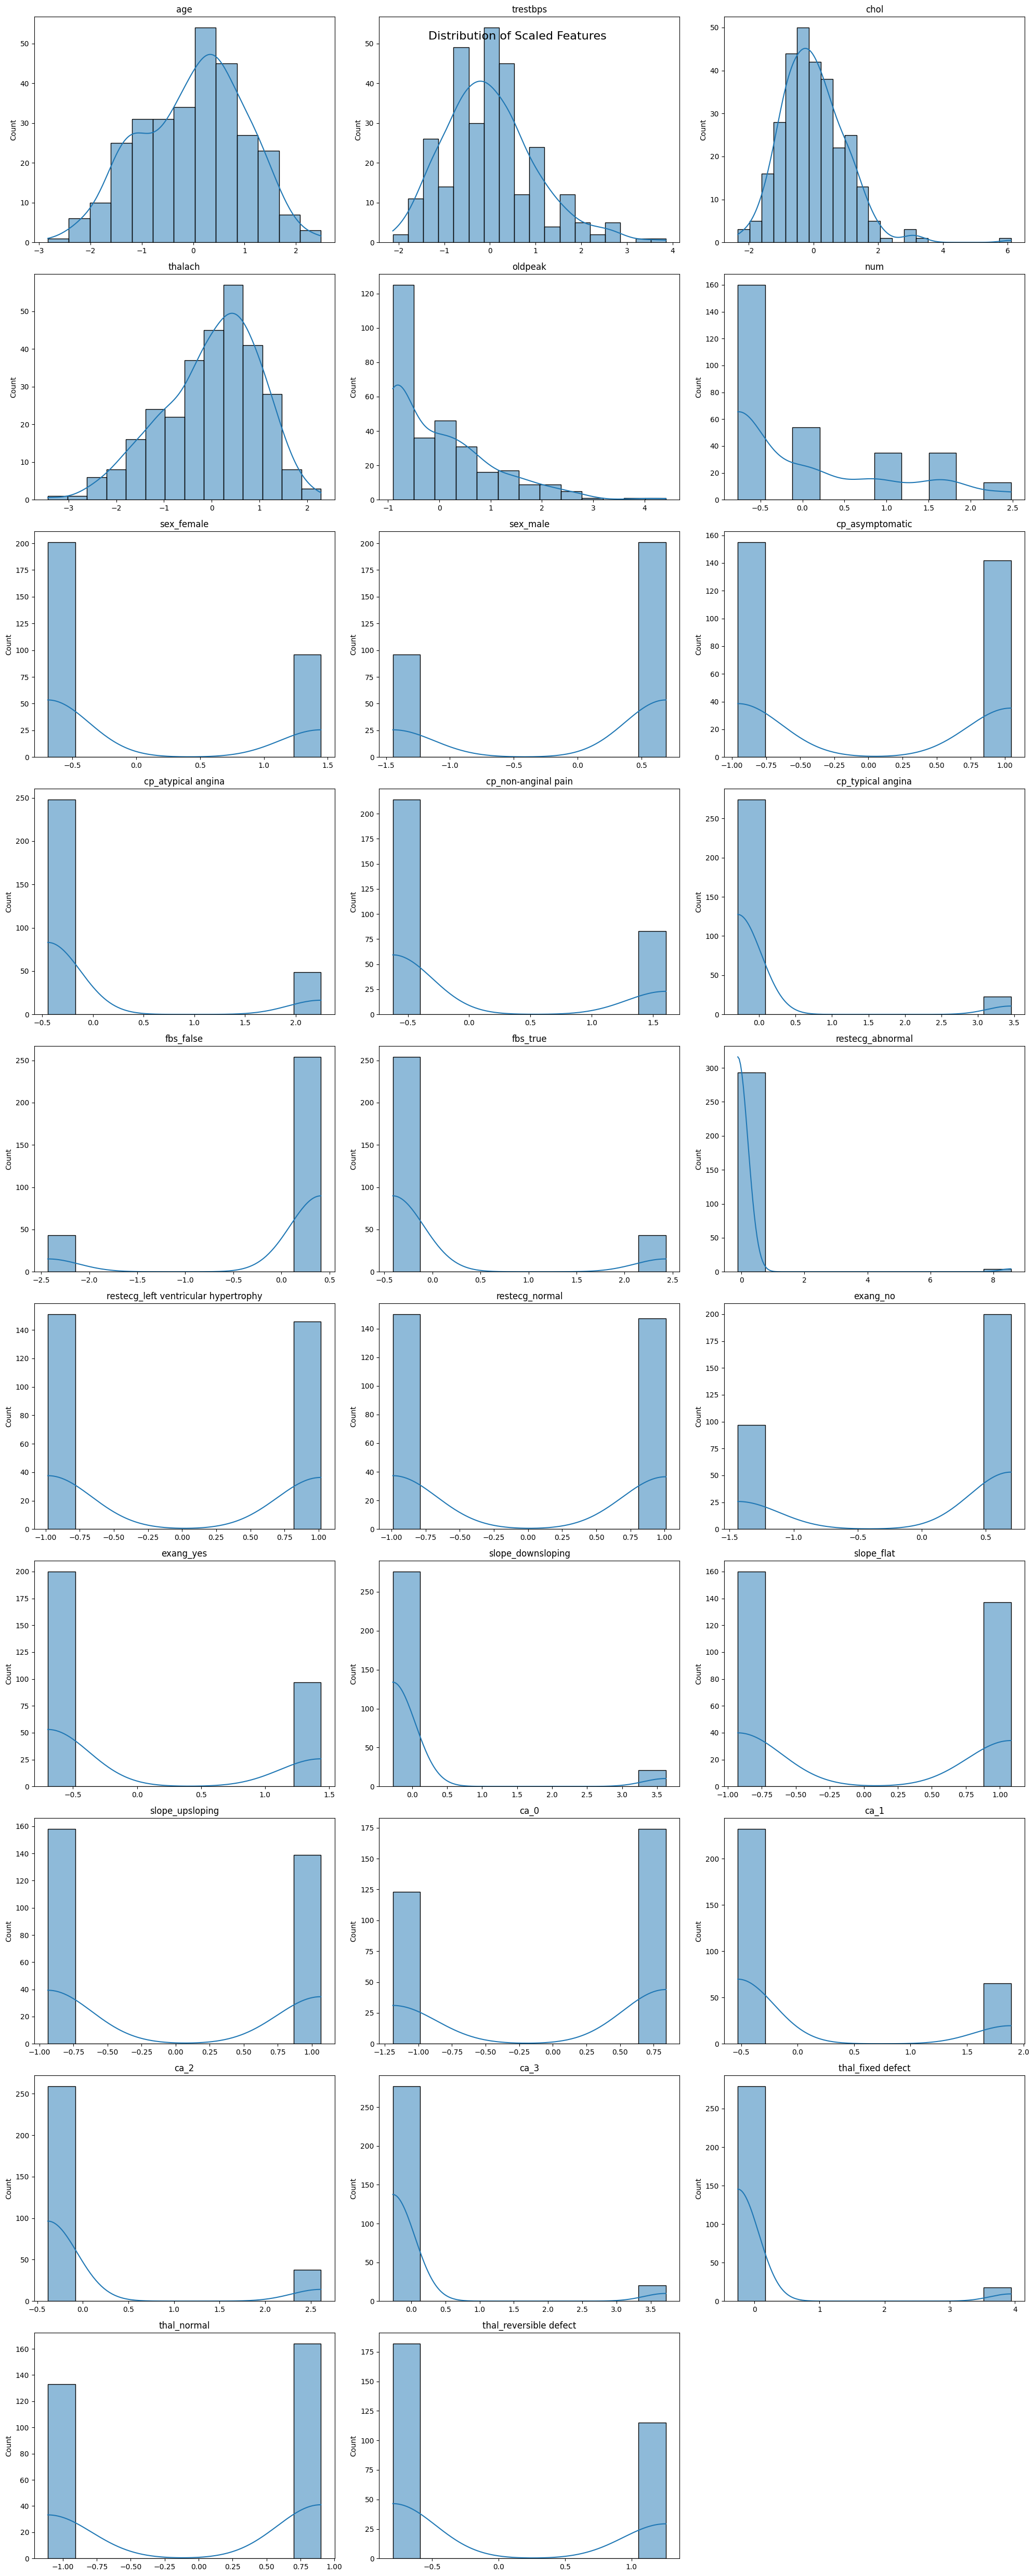

Total number of features plotted: 29


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_features = len(data_scaled.columns)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribution of Scaled Features', fontsize=16)

axes_flat = axes.flatten()
for i, column in enumerate(data_scaled.columns):
    sns.histplot(data=data_scaled, x=column, ax=axes_flat[i], kde=True)
    axes_flat[i].set_title(column)
    axes_flat[i].set_xlabel('')

# Remove any unused subplots
for j in range(n_features, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

print(f"Total number of features plotted: {n_features}")

# KMeans Clustering

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

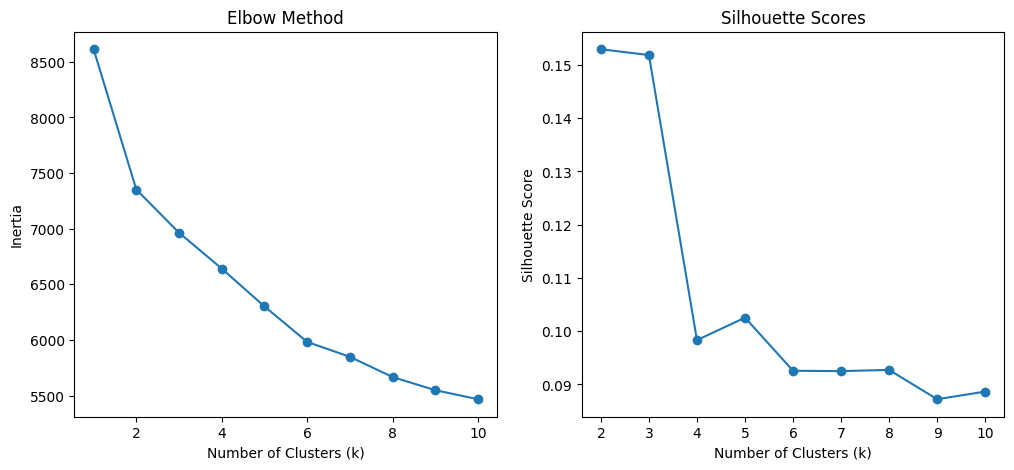

In [14]:
inertia = []
silhouette_scores = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


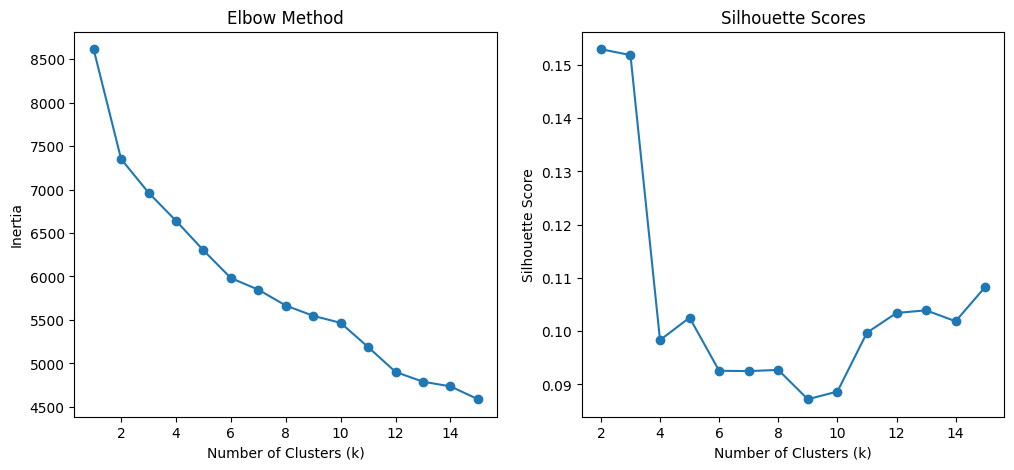

In [15]:
inertia = []
silhouette_scores = []
k_values = range(1, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()




The Elbow Method suggests k = 4 as the optimal number of clusters, whereas the Silhouette Scores favor k = 2. For better-defined clusters (higher silhouette score) or more segmentation (higher k), I choose k = 4 as a balanced option, or k = 2 for fewer, more distinct clusters.

In [16]:
# Fit K-Means with optimal k
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

## Hierarchical Clustering

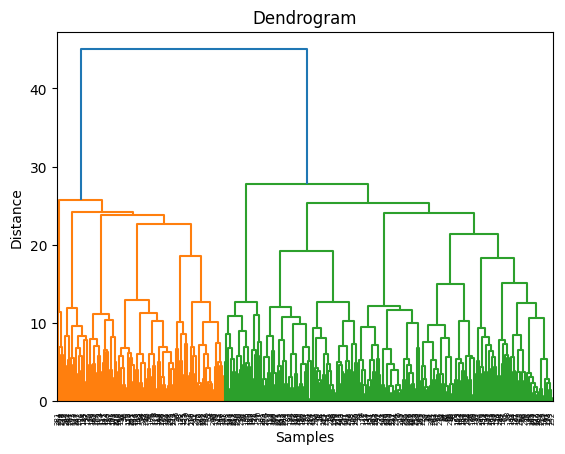

In [17]:
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

## DBSCAN Clustering

Text(0.5, 0, 'Data Points sorted by distance')

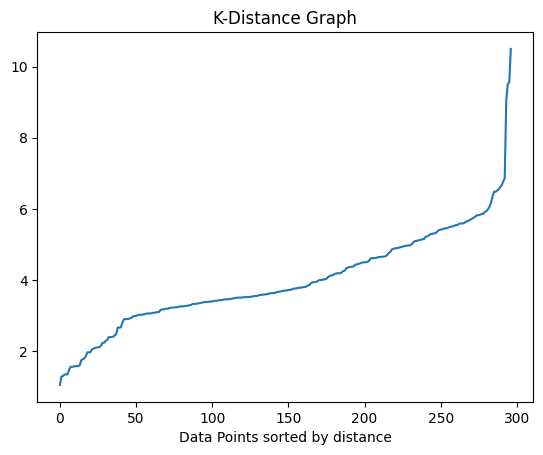

In [28]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)
distances = np.sort(distances[:, 3], axis=0)

plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')


### Explanation

The K-distance graph helps to determine the best value for the `eps` parameter in DBSCAN. From the graph above the point of maximu, curvature in the graph occurs aroounf the 6-7 mark on the Y-axis. So I'll be using eps = 6

In [72]:
eps = 6
min_samples = 2

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate the results
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {num_clusters}")

Number of clusters found by DBSCAN: 2


## Explanation

Given that the data is sparse, due to the one hot encoding of categorical data, I realized that DBSCAN struggled to find an optimal number of clusters for min samples != 2, and this boils down to the `curse of dimensionality`. So it is most probable to perform Dimensionality Reduction (PCA).